In [ ]:
!pip install matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
covid = pd.read_csv("covid_19_data.csv")
print(covid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18327 entries, 0 to 18326
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              18327 non-null  int64  
 1   ObservationDate  18327 non-null  object 
 2   Province/State   9050 non-null   object 
 3   Country/Region   18327 non-null  object 
 4   Last Update      18327 non-null  object 
 5   Confirmed        18327 non-null  float64
 6   Deaths           18327 non-null  float64
 7   Recovered        18327 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.1+ MB
None


In [ ]:
# Total number of rows and columns
num_rows = covid.shape[0]
num_cols = covid.shape[1]

print(f'The dataset has {num_rows} rows and {num_cols} columns.')

The dataset has 18327 rows and 7 columns.


In [ ]:
print("Size/Shape of the dataset-",covid.shape)
print("Checking for null values-",covid.isnull().sum())
print("Checking Data-type-",covid.dtypes)

Size/Shape of the dataset- (18327, 7)
Checking for null values- ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking Data-type- ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object


In [ ]:
#Dropping the column
covid.drop(["SNo"],1,inplace=True)

In [ ]:
covid.isnull().sum()

ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

**DIFFERENT TYPES OF CASES AS PER DATE**

In [ ]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])
#Grouping differnent types of cases as per the date
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("Basic Information")
print("Total number of Confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))

Basic Information
Total number of Confirmed cases around the world 2811193.0
Total number of Recovered cases around the world 793601.0
Total number of Death cases around the world 197159.0
Total number of Active cases around the world 1820433.0
Total number of Closed cases around the world 990760.0


**DATE-WISE ACTIVE CASES**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 [Text(0, 0, '2020-01-22'),
  Text(1, 0, '2020-01-23'),
  Text(2, 0, '2020-01-24'),
  Text(3, 0, '2020-01-25'),
  Text(4, 0, '2020-01-26'),
  Text(5, 0, '2020-01-27'),
  Text(6, 0, '2020-01-28'),
  Text(7, 0, '2020-01-29'),
  Text(8, 0, '2020-01-30'),
  Text(9, 0, '2020-01-31'),
  Text(10, 0, '2020-02-01'),
  Text(11, 0, '2020-02-02'),
  Text(12, 0, '2020-02-03'),
  Text(13, 0, '2020-02-04'),
  Text(14, 0, '2020-02-05'),
  Text(15, 0, '2020-02-06'),
  Text(16, 0, '2020-02-07'),
  Text(17, 0, '2020-02-08'),
  Text(18, 0, '2020-02-09'),
  Text(19, 0, '2020-02-10'),
  Te

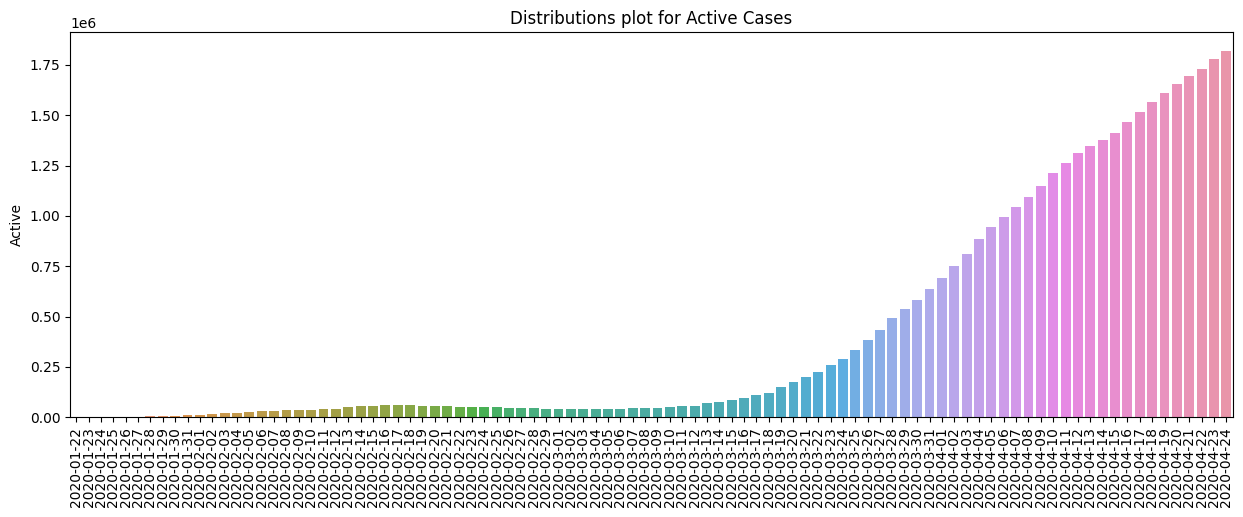

In [ ]:
datewise['Active']=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise['Active'])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)

**DATE-WISE CLOSED CASES**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 [Text(0, 0, '2020-01-22'),
  Text(1, 0, '2020-01-23'),
  Text(2, 0, '2020-01-24'),
  Text(3, 0, '2020-01-25'),
  Text(4, 0, '2020-01-26'),
  Text(5, 0, '2020-01-27'),
  Text(6, 0, '2020-01-28'),
  Text(7, 0, '2020-01-29'),
  Text(8, 0, '2020-01-30'),
  Text(9, 0, '2020-01-31'),
  Text(10, 0, '2020-02-01'),
  Text(11, 0, '2020-02-02'),
  Text(12, 0, '2020-02-03'),
  Text(13, 0, '2020-02-04'),
  Text(14, 0, '2020-02-05'),
  Text(15, 0, '2020-02-06'),
  Text(16, 0, '2020-02-07'),
  Text(17, 0, '2020-02-08'),
  Text(18, 0, '2020-02-09'),
  Text(19, 0, '2020-02-10'),
  Te

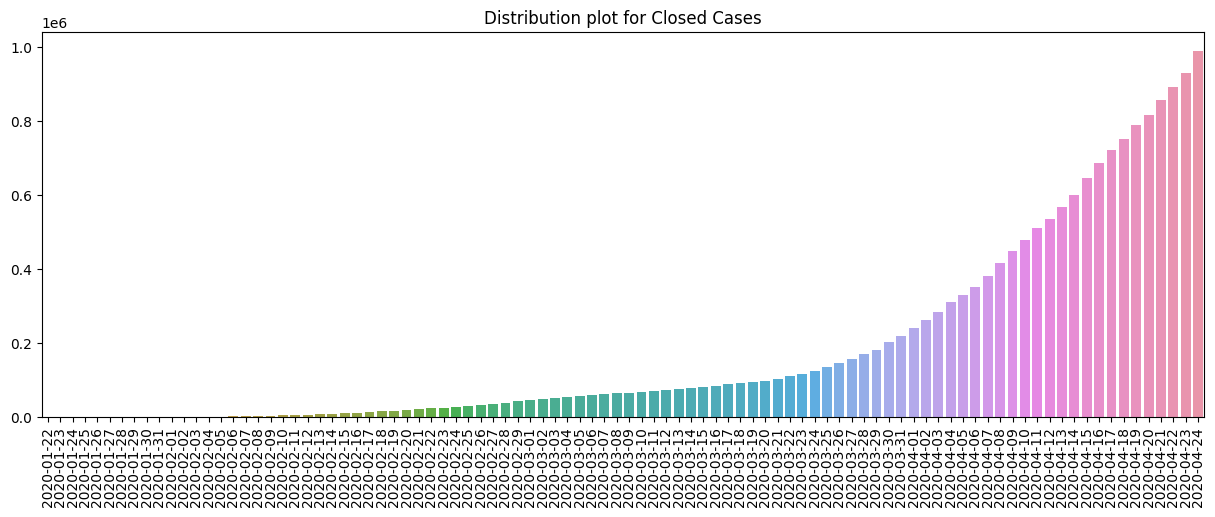

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution plot for Closed Cases")
plt.xticks(rotation=90)

**WEEKLY PROGRESS OF DIFFERENT TYPES OF CASES**

<ipython-input-28-51dec43363de>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  datewise["WeekofYear"] = datewise.index.weekofyear


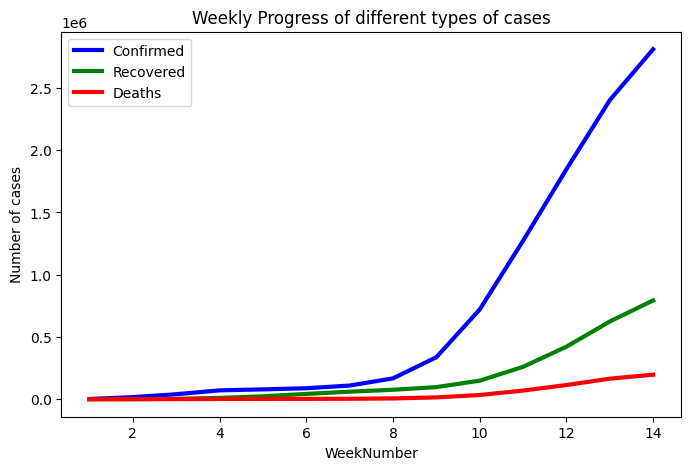

In [ ]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8, 5))
plt.plot(week_num, weekwise_confirmed, linewidth=3, label='Confirmed', color='blue')
plt.plot(week_num, weekwise_recovered, linewidth=3, label='Recovered', color='green')
plt.plot(week_num, weekwise_deaths, linewidth=3, label='Deaths', color='red')
plt.legend()
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")
plt.show()

**WEEKLY INCREASE IN CONFIRMED AND DEATH CASES**

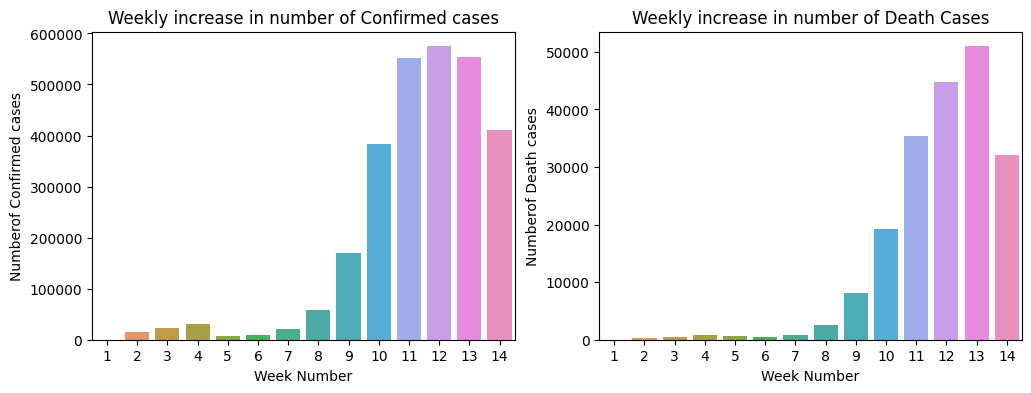

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x= week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Numberof Confirmed cases")
ax2.set_ylabel("Numberof Death cases")
ax1.set_title("Weekly increase in number of Confirmed cases")
ax2.set_title("Weekly increase in number of Death Cases")
plt.show()

**DAILY DATA ANALYSIS OF DIFFERENT CASES**

Average increase in number of Confirmed cases everyday: 29900.0
Average increase in number of Recovered cases everyday: 8442.0
Average increase in number of Death cases everyday: 2097.0


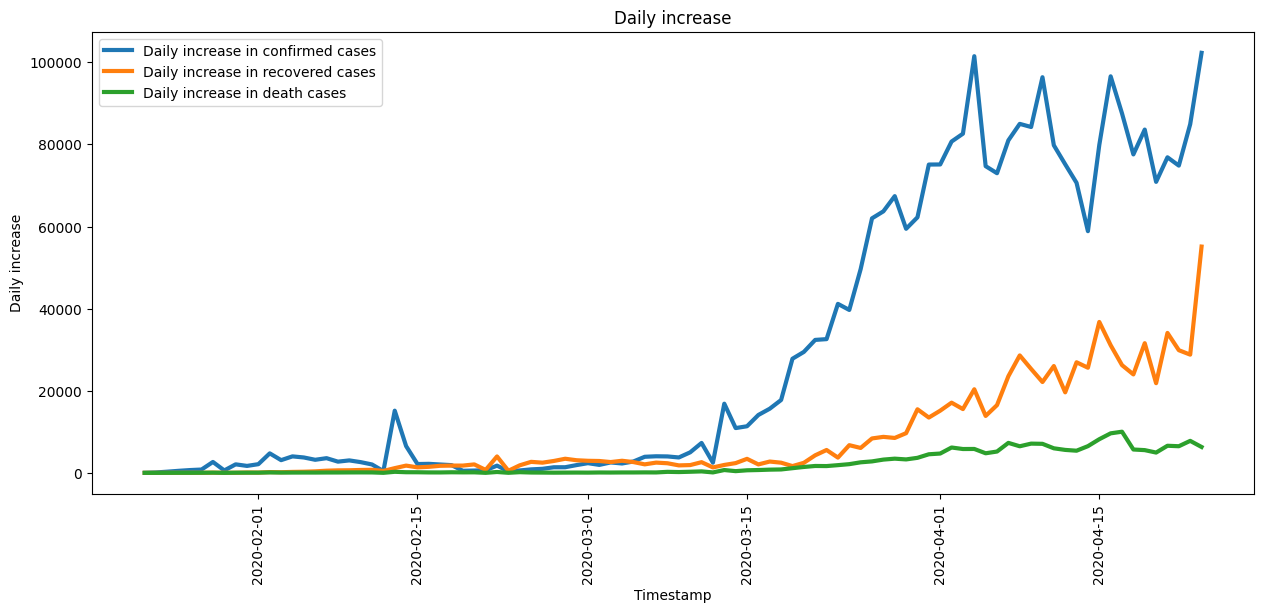

In [ ]:
# Daily data analysis
print("Average increase in number of Confirmed cases everyday:",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday:",np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

**TOP-20 COUNTRIES AS PER NUMBER OF DEATH CASES**

Text(0.5, 1.0, 'Top 20 countries as per number of death cases')

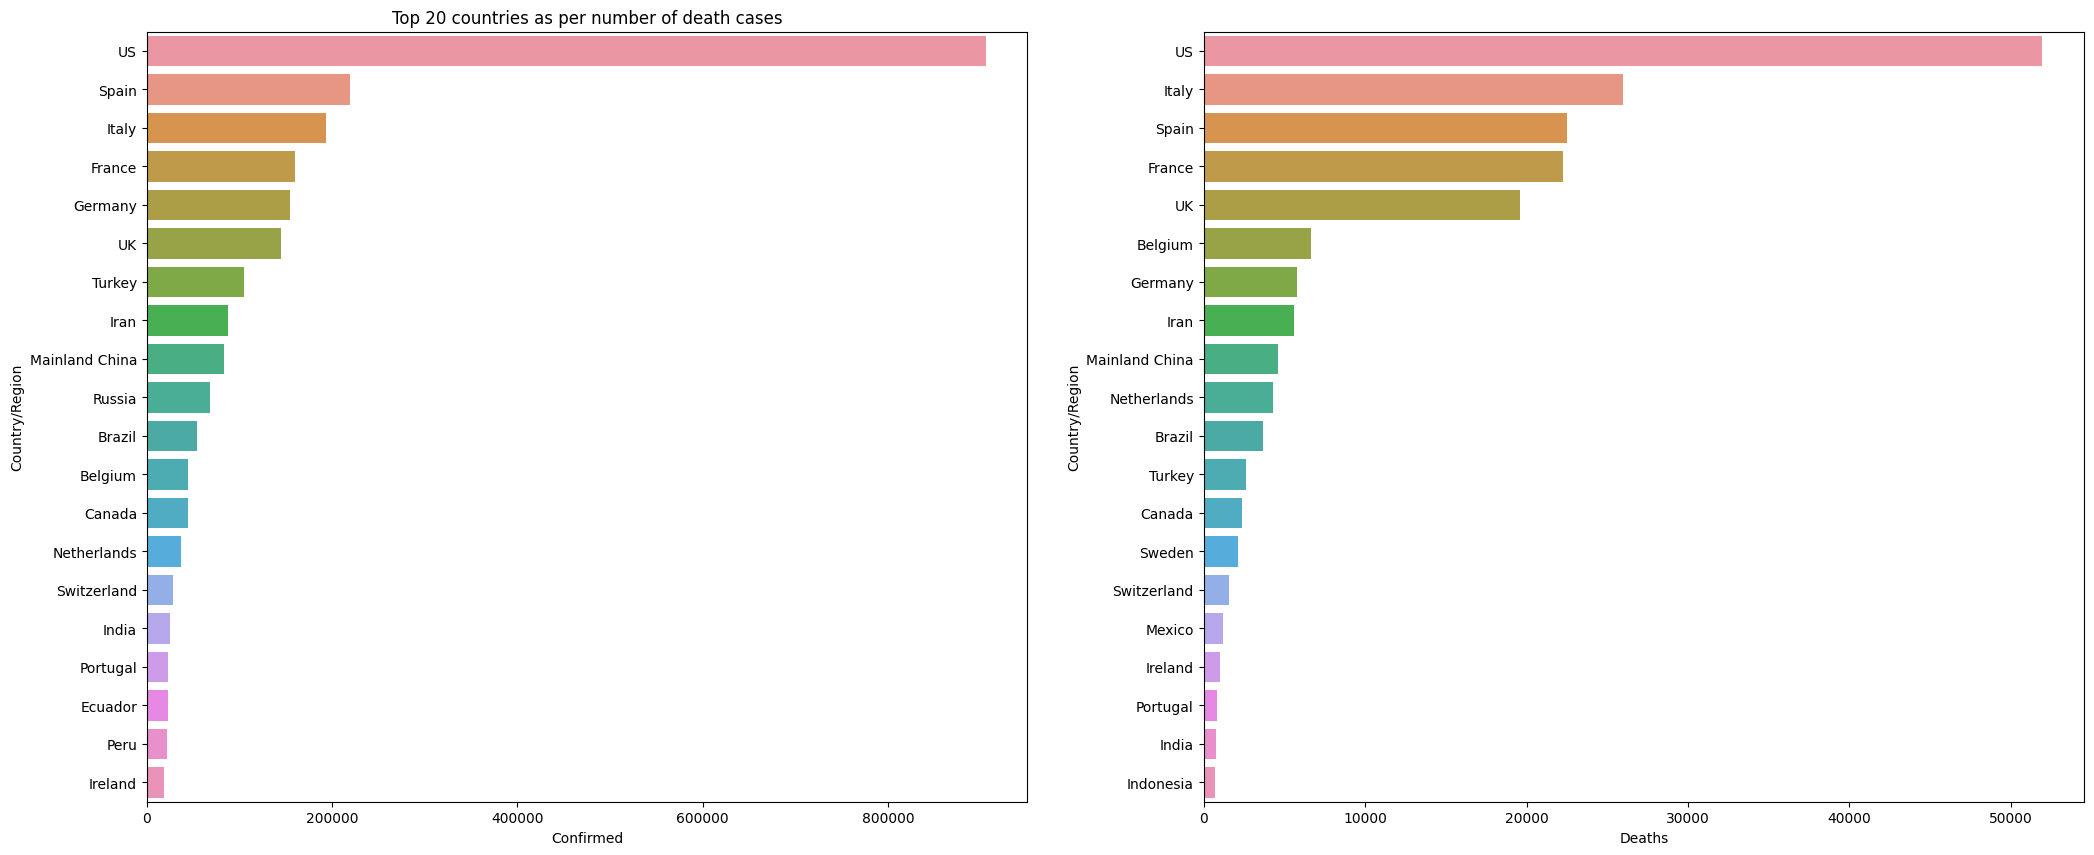

In [ ]:
#Country wise analysis
countrywise= covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_20confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(20)
top_20deaths = countrywise.sort_values(["Deaths"],ascending=False).head(20)
sns.barplot(x=top_20confirmed["Confirmed"],y=top_20confirmed.index,ax=ax1)
ax1.set_title("Top 20 countries as per number of confirmed cases")
sns.barplot(x=top_20deaths["Deaths"],y=top_20deaths.index,ax=ax2)
ax1.set_title("Top 20 countries as per number of death cases")

In [ ]:
#Data Anlaysis for India
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("DATA ANALYSIS OF INDIA")
print(datewise_india.iloc[-1])
print("Total Active Cases",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

DATA ANALYSIS OF INDIA
Confirmed    24530.0
Recovered     5498.0
Deaths         780.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases 18252.0
Total Closed Cases 6278.0


In [ ]:
#Data Anlaysis for US
us_data = covid[covid["Country/Region"]=="US"]
datewise_us = us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("DATA ANALYSIS OF US")
print(datewise_us.iloc[-1])
print("Total Active Cases",datewise_us["Confirmed"].iloc[-1]-datewise_us["Recovered"].iloc[-1]-datewise_us["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_us["Recovered"].iloc[-1]+datewise_us["Deaths"].iloc[-1])

DATA ANALYSIS OF US
Confirmed    905333.0
Recovered     99079.0
Deaths        51949.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases 754305.0
Total Closed Cases 151028.0


In [ ]:
#DATE-WISE ANALYSIS OF DIFFERENT COUNTRIES
max_ind = datewise_india["Confirmed"].max()
china_data = covid[covid["Country/Region"]=="Mainland China"]
Italy_data = covid[covid["Country/Region"]=="Italy"]
US_data = covid[covid["Country/Region"]=="US"]
spain_data = covid[covid["Country/Region"]=="Spain"]
datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

print("DATE-WISE ANALYSIS")
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed Cases")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reach number of Confirmed Cases")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed Cases")
print("It took",datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_ind)].shape[0],"days in China to reach number of Confirmed Cases")

DATE-WISE ANALYSIS
It took 86 days in India to reach 24530.0 Confirmed Cases
It took 44 days in Italy to reach number of Confirmed Cases
It took 59 days in US to reach number of Confirmed Cases
It took 49 days in Spain to reach number of Confirmed Cases
It took 14 days in China to reach number of Confirmed Cases


**TIME-SERIES MODELLING using LR & SVR to predict future COVID-19 cases based on the number of days since the beginning of the dataset.**

In [ ]:
#The number of days since the first observation in the dataset
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days

#These lines split the dataset into training and validation sets.
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95):]

#models are instantiated and fitted using the training data.
model_scores=[]
lin_reg = LinearRegression()
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

#Predictions are made on the validation set using both LR & SVR
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

#This loop predicts the future COVID-19 cases for the next 30 days using both LR & SVR
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,30):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)

#the predictions are compiled into a DataFrame
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(30)

,Dates,LR,SVR
0,2020-04-25,1560529,3322586
1,2020-04-26,1582219,3500761
2,2020-04-27,1603909,3686599
3,2020-04-28,1625599,3880344
4,2020-04-29,1647289,4082245
5,2020-04-30,1668980,4292557
6,2020-05-01,1690670,4511540
7,2020-05-02,1712360,4739461
8,2020-05-03,1734050,4976588
9,2020-05-04,1755740,5223200


**TIME-SERIES FORECASTING using the ARIMA (AutoRegressive Integrated Moving Average) model.**

Root Mean Squared Error (RMSE): 62209.84694669174


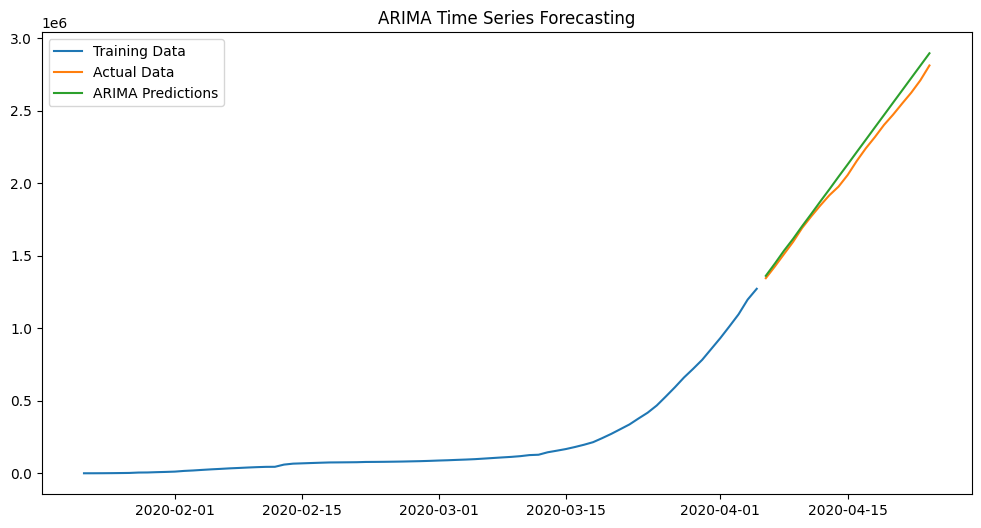

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Convert the 'ObservationDate' column to datetime
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'], format='%m/%d/%Y')

# data is grouped by the observation date, and the sum of confirmed cases for each date is calculated
data = covid.groupby('ObservationDate')['Confirmed'].sum().reset_index()

# The 'ObservationDate' column is set as the index of the dataframe.
data.set_index('ObservationDate', inplace=True)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

# Train the ARIMA model
#a seasonal autoregressive component with lag 5, a differencing order of 1, and no moving average component
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# The model is used to forecast the future values (length of the test set) based on the trained parameters
predictions = model_fit.forecast(steps=len(test))

# The Root Mean Squared Error (RMSE) is calculated to evaluate the performance of the model.
# It measures the difference between the predicted values and the actual values in the test set
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data')
plt.plot(predictions, label='ARIMA Predictions')
plt.title('ARIMA Time Series Forecasting')
plt.legend()
plt.show()